# Loan Payment Behavior Prediction

## The Data

I will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### My Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### The good news is feature information has also been provided as a .csv file in ordered to be refered during the project!

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
# I define a new function that takes the column name (feature name) and returns the description.
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


# Step 1: Loading the data and importing the required libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [7]:
df = pd.read_csv('lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Step 2: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**

I am going to see whether I can find some meaningful relationships between any pairs of features or not.

----

C:\Users\poory\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

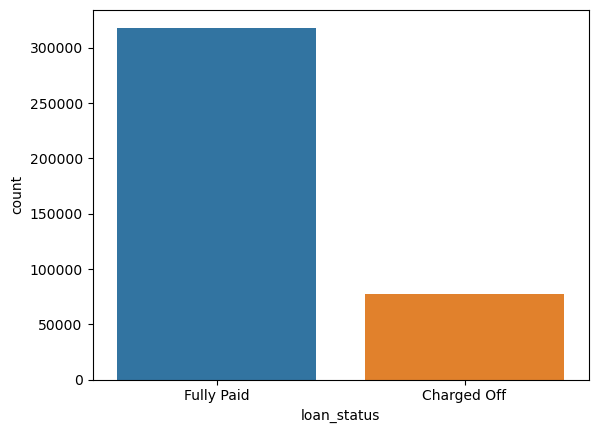

In [9]:
# I start with a countplot showing the number of customers who have paid their loan off and who have not.
sns.countplot('loan_status',data = df)

**TASK: Create a histogram of the loan_amnt column.**

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

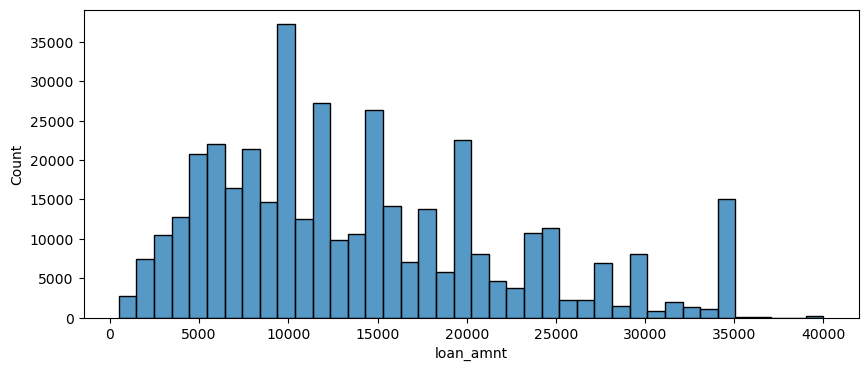

In [10]:
# Another useful data is the amout of loans and its distribution
plt.figure(figsize=(10,4))
sns.histplot(df['loan_amnt'],bins = 40)

In [11]:
df['loan_amnt'].describe()

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

In [12]:
# It looks like the average loan is about 14000$ but we still have a relatively large number of people who have borrowed more than 33000$

df[(df['loan_amnt']>33000) & (df['loan_amnt']<35000)]['loan_amnt'].count()

1541

**Let's explore correlation between the continuous feature variables.**

In [13]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


#### Highest correlation is seen between loan amount and installment, Number of public records and number of bankruptcies, and the number of open credit lines and total number of credit lines the client has.

<AxesSubplot:>

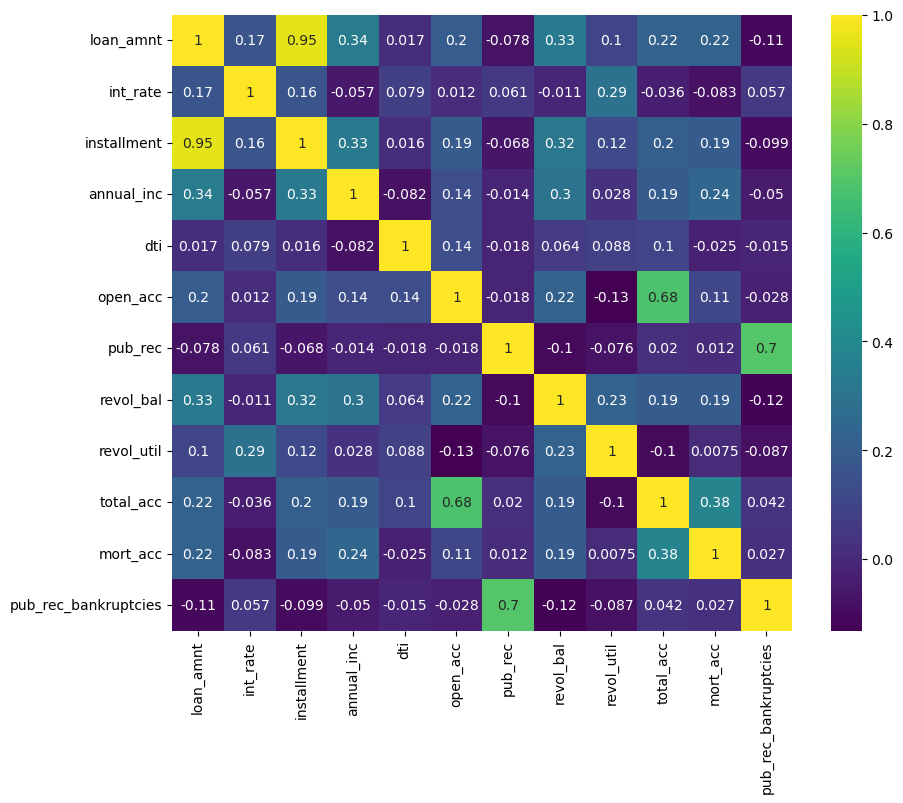

In [14]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

<AxesSubplot:>

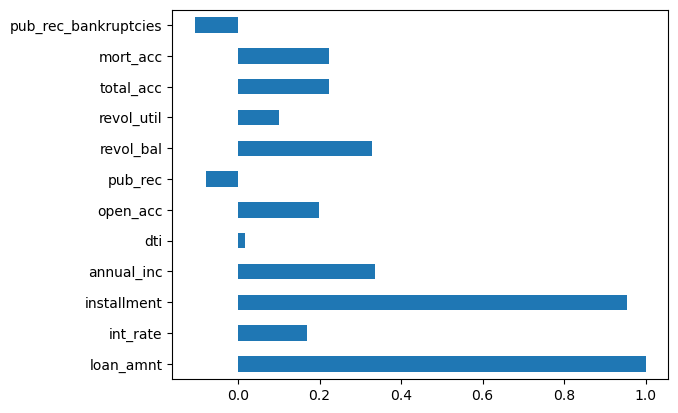

In [15]:
df.corr()['loan_amnt'].plot(kind = 'barh')

**Let's Explore the correlation between 'installment' and 'loan_amnt' furthur. 95% is something we should be suspecious about!**

In [16]:
feat_info('loan_amnt')
print('\n')
feat_info('installment')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


The monthly payment owed by the borrower if the loan originates.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

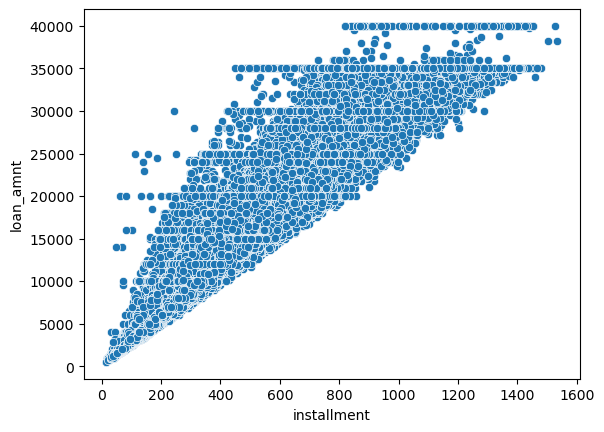

In [17]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

**I think it is a good idea to check the relationship between the loan_status and the Loan Amount.**

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

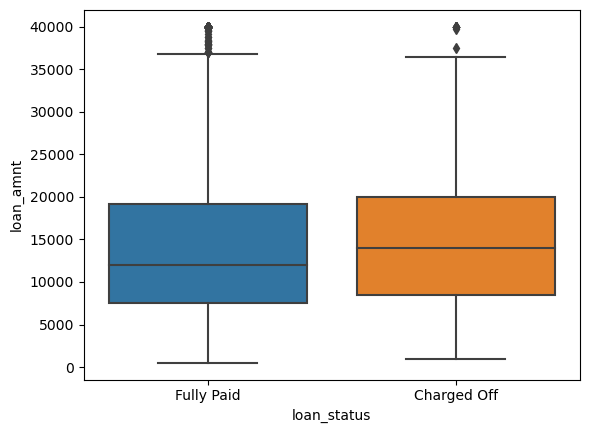

In [18]:
sns.boxplot(x = 'loan_status', y='loan_amnt',data=df)

**In ordert to interpret the box plot better I would create a table of the summary statistics for the loan amount, grouped by the loan_status.**

In [19]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**It seems that the statistics are very close in both groups but the number of unpaid loans are much fewer than the fully-paid cases.**

**In the next step, I would like to explore the grade and subgrade attributes**

In [20]:
feat_info('grade')
print('\n')
feat_info('sub_grade')

LC assigned loan grade


LC assigned loan subgrade


In [21]:
# Let's see how many uniques grades and subgrades we have.

print(sorted(df['grade'].unique()))
print('\n')
print(sorted(df['sub_grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


**I start with creating a countplot per grade with the hue set to the loan_status label.**

<AxesSubplot:xlabel='grade', ylabel='count'>

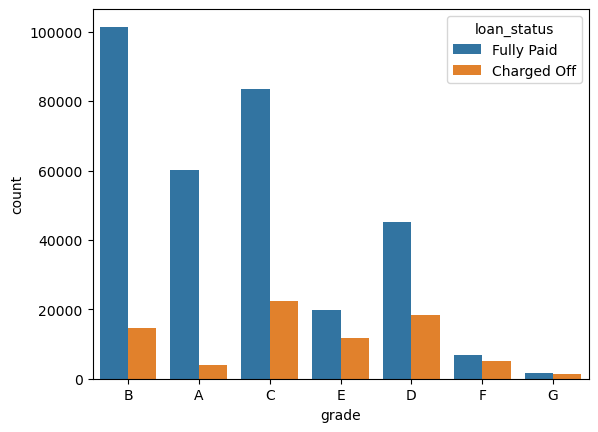

In [22]:
sns.countplot(x = 'grade',hue = 'loan_status', data = df)

**The two grades F and G do not see to have paid their loans properly. Grade E has a higher rate in fully-paid cases but compared to A,B,C and D the borrowers have done poorly in paying their loans back. More information may be revealed once we explore the subgrades. I create a count plot per subgrade and reorder the x axis.**

C:\Users\poory\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

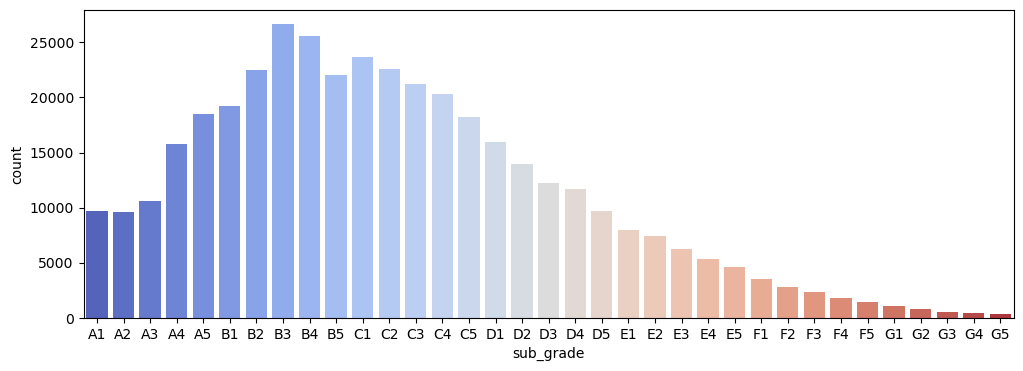

In [23]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(df['sub_grade'],order = subgrade_order,palette = 'coolwarm')

C:\Users\poory\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

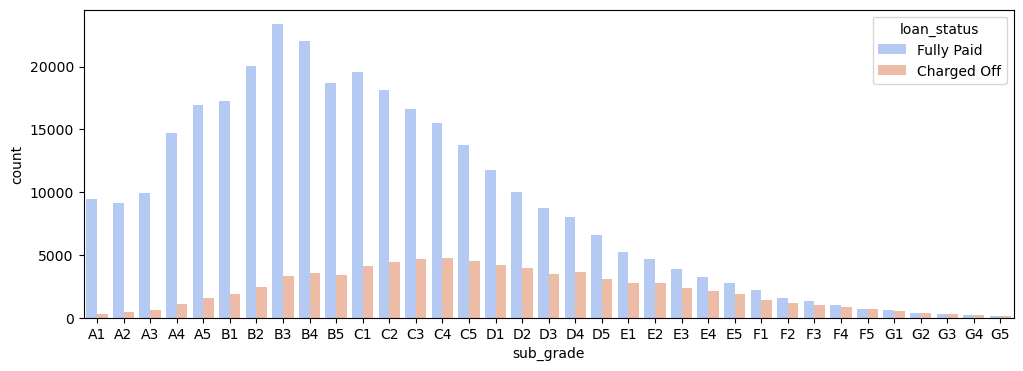

In [24]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot('sub_grade',order = subgrade_order,hue = 'loan_status', palette = 'coolwarm', data = df)

**It looks like F and G subgrades don't get paid back that often. I Isloate those and recreate the countplot just for those subgrades.**

C:\Users\poory\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

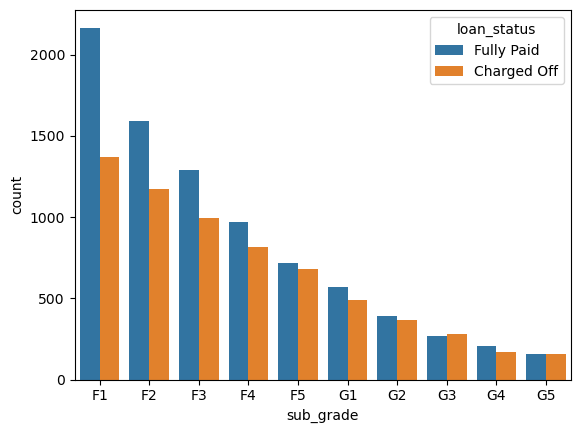

In [25]:
df_F_G = df[(df['grade']=='F') | (df['grade']=='G')]
F_G_order = sorted(df_F_G['sub_grade'].unique())
sns.countplot('sub_grade',order = F_G_order, hue = 'loan_status', data = df_F_G)

**I need to convert 'loan_status' into numeric values. Here, I prefer to make a dictionary instead of using Label Encoder**

In [26]:
loan_dict = {'Fully Paid':1,'Charged Off':0}
df['loan_repaid'] = df['loan_status'].map(loan_dict)

In [27]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**Now I use this newly defined column to create a correlation barplot.**

<AxesSubplot:>

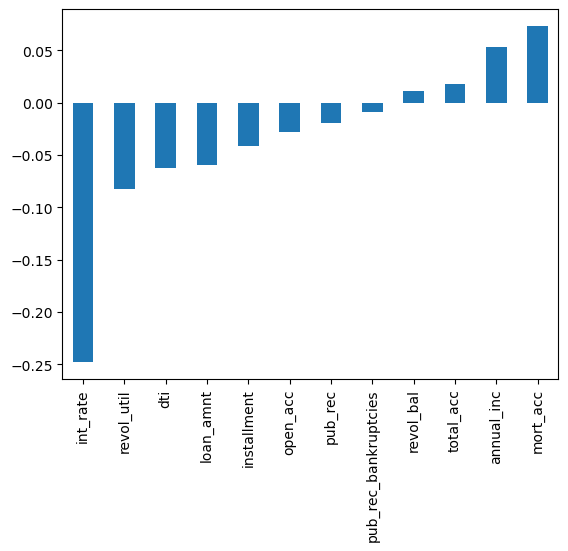

In [28]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')

---
---
# Step 3: Data PreProcessing

**In this section I will
Remove or fill any missing data, 
Remove unnecessary or repetitive features 
and Convert categorical string features to dummy variables.**



In [29]:
# Let's get the head of our dataset again
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. I use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

In [30]:
# First we check the total length of our data frame (number of rows or samples)
len(df)

396030

In [31]:
# First I check the missing data amount for each feature. The series is created as follows:

df.isnull().sum()

# It is more useful to get the relative frequency or the percentage of missing data for each feature.

(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [32]:
# We have two features, 'emp_title' and 'emp_length' to explore as the first columns with missing data. I start with printing out their information

feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [33]:
# Let's check to find how many unique job titles we have in the data set
df['emp_title'].nunique()

173105

In [34]:
# And if we want to see the total number of each title we check:
df['emp_title'].value_counts()

Teacher                              4389
Manager                              4250
Registered Nurse                     1856
RN                                   1846
Supervisor                           1830
                                     ... 
Rental Assistance Program Manager       1
Remed                                   1
Assistant Superintendent for HR         1
Tier II Technical Representative        1
Ab tankerman                            1
Name: emp_title, Length: 173105, dtype: int64

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature and use one-hot encoding. Let's remove that emp_title column.**

In [35]:
df = df.drop('emp_title',axis=1)

In [36]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**The second column that is closely related to emp_title is emp_length. In order to make a decision about this feature, I create a count plot of the emp_length feature column.**

In [37]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

C:\Users\poory\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

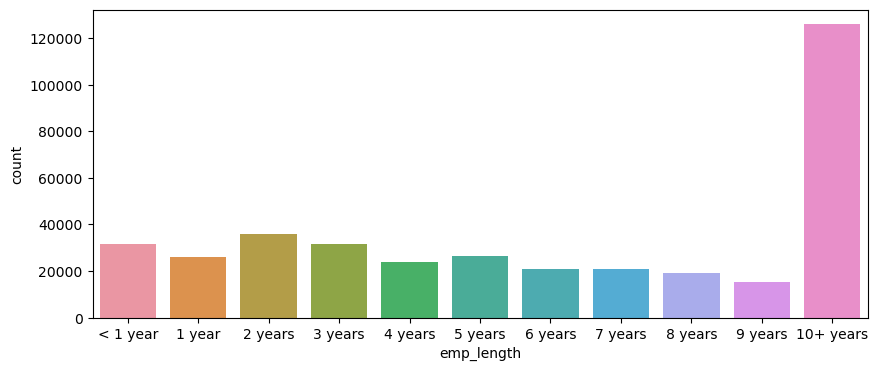

In [38]:
plt.figure(figsize=(10,4))
emp_length_order = ['< 1 year',
                    '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

sns.countplot('emp_length', order = emp_length_order, data = df)

C:\Users\poory\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

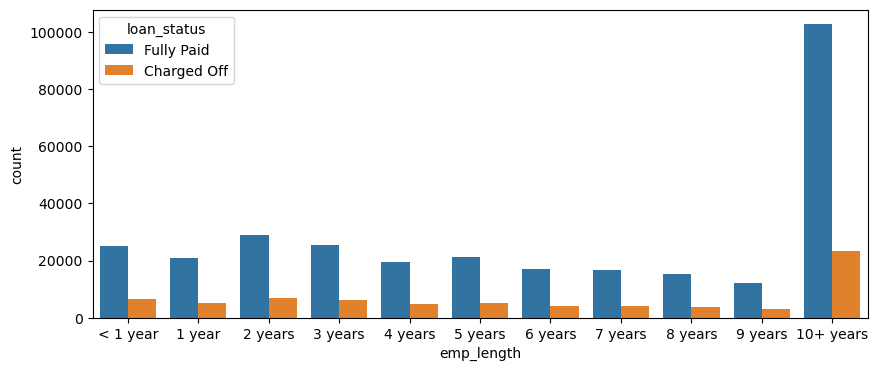

In [39]:
# Let's check and see how many of the loans have been paid off by each group of employment length.
plt.figure(figsize=(10,4))
emp_length_order = ['< 1 year',
                    '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

sns.countplot('emp_length', order = emp_length_order, hue = 'loan_status', data = df)

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what I want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.**

In [40]:
# I show fully paid with fp and charged off with co

In [41]:
co = df[df['loan_status']=='Charged Off'].groupby('emp_length')['loan_status'].count()
fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length')['loan_status'].count()

emp_len = co/fp

In [42]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

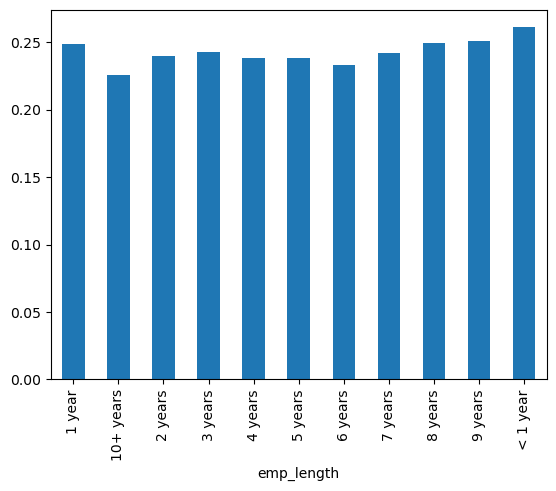

In [43]:
emp_len.plot(kind = 'bar')

**Charge off rates are extremely similar across all employment lengths. I think I can drop the emp_length column.**

In [44]:
df = df.drop('emp_length',axis=1)

**Let's revisit the DataFrame to see what feature columns still have missing data.**

In [45]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**It looks like the 'title' column just gives the same information as 'purpose' column.**

In [46]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [47]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**The title column is simply a string subcategory/description of the purpose column. I drop the title column.**

In [48]:
df = df.drop('title',axis=1)

---
**The next column with missing values is 'mort_acc'.
Let's find out what the mort_acc feature represents first.**

In [49]:
feat_info('mort_acc')

Number of mortgage accounts.


In [50]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**It's a challenge to make a decision on how to fill the missing values in this column. Let's first start with correlation with other attributes**

In [79]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

<AxesSubplot:>

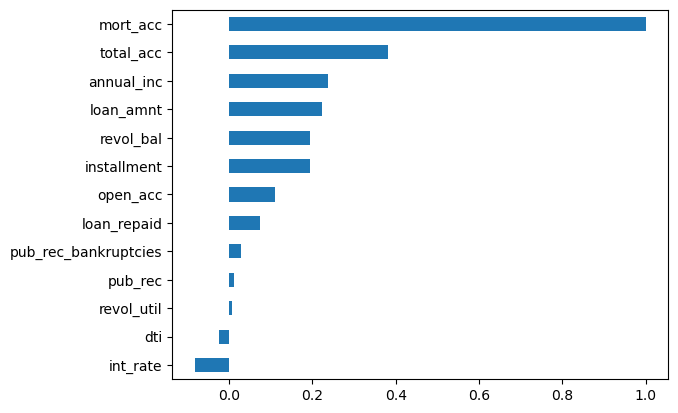

In [81]:
df.corr()['mort_acc'].sort_values().plot(kind = 'barh')

**Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. I will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [87]:
total_mort_acc = df.groupby('total_acc')['mort_acc'].mean()

**Now I fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then I will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.**

<AxesSubplot:>

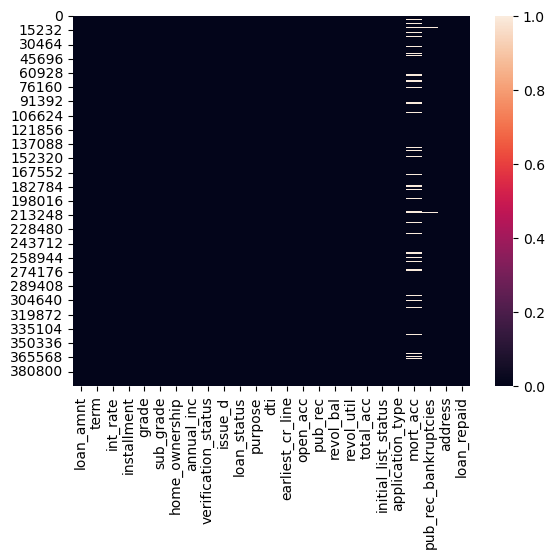

In [95]:
sns.heatmap(df.isnull())

In [119]:
total_mort_acc = pd.DataFrame(total_mort_acc)
total_mort_acc = total_mort_acc.drop(['level_0','index'],axis=1)

In [123]:
total_mort_acc[total_mort_acc['total_acc']==3]['mort_acc']

1    0.052023
Name: mort_acc, dtype: float64

In [140]:
def filler(mort_acc):
    if np.isnan(mort_acc):
        return total_mort_acc[total_mort_acc['mort_acc']==mort_acc]['total_acc']
    else:
        return mort_acc

In [ ]:
df['mort_acc'] = df['mort_acc'].apply(lambda x:filler(x))

<AxesSubplot:>

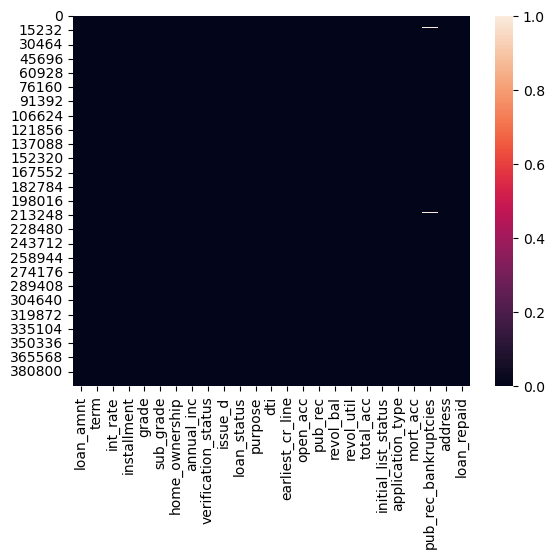

In [147]:
sns.heatmap(df.isnull())

In [148]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**We still have two columns of 'revol_util' and 'pub_rec_bankruptcies' with missing data. I need to explore the information of these two more**

In [149]:
feat_info('revol_util')
print('\n')
feat_info('pub_rec_bankruptcies')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


Number of public record bankruptcies


<AxesSubplot:>

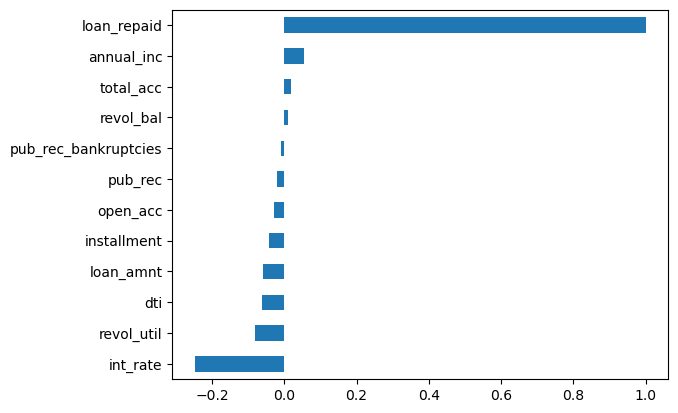

In [152]:
df.corr()['loan_repaid'].sort_values().plot(kind = 'barh')

**Both features contribute for less than 0.5% of the data. Neither one is closely correlated with the target either. Therefore it would be reasonable to remove the rows with missing data. But of course we keep the whole column into consideration.**

In [159]:
df = df.dropna()

In [212]:
df.isnull().sum()

loan_amnt           0
term                0
int_rate            0
installment         0
annual_inc          0
                   ..
zip_code_48052      0
zip_code_70466      0
zip_code_86630      0
zip_code_93700      0
earliest_cr_year    0
Length: 80, dtype: int64

## Categorical Variables and Dummy Variables

**Now that I am done working with the missing data, I need to deal with the string values due to the categorical columns.**

In [164]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'mort_acc', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature


In [165]:
df['term']

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 395219, dtype: object

In [166]:
# I only need the first integers that represent the payment length
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

In [168]:
df['term'].dtype

dtype('int64')

### grade feature

**We already know grade is part of sub_grade, so I would drop the grade feature since it does not give me more information.**

In [169]:
df = df.drop('grade',axis=1)

**I need to convert the subgrade into dummy variables.**

In [173]:
df = pd.get_dummies(df, columns =['sub_grade'],drop_first =True)

In [175]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**The I convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables.**

In [178]:
df = pd.get_dummies(df,columns = ['verification_status', 'application_type','initial_list_status','purpose'], drop_first=True)

In [179]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid',
       'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3',
       'sub_grade_G4', 'sub_grade_G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL'

### home_ownership


In [180]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**I convert these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER.**

In [181]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [182]:
df = pd.get_dummies(df, columns = ['home_ownership'], drop_first = True)

### address
**The most important part of an address is the zip code. So I create a new columns as zipcode and drop the address column**

In [194]:
df['zip_code'] = df['address'].apply(lambda x:x[-5:])

In [196]:
df = pd.get_dummies(df, columns = ['zip_code'], drop_first = True)

In [198]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
       'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'applicat

### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date. I drop this feature.**

In [199]:
df = df.drop('issue_d',axis=1)

### earliest_cr_line
**This appears to be a historical time stamp feature. I only extract the year and set this new data to a feature column called 'earliest_cr_year'.Then I drop the earliest_cr_line feature.**

In [203]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x:int(x[-4:]))

In [205]:
df = df.drop('earliest_cr_line',axis=1)

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [208]:
from sklearn.model_selection import train_test_split

**I forgot to drop the load_status column since its a duplicate of the loan_repaid column. I will use the loan_repaid column since its already in 0s and 1s.**

In [210]:
df = df.drop('loan_status',axis=1)

**Now I define X and y variables to the .values of the features and label.**

In [235]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**I use a MinMaxScaler to normalize the feature data X_train and X_test. We don't want data leakge from the test set so we only fit on the X_train data.**

In [237]:
from sklearn.preprocessing import MinMaxScaler

In [238]:
MMC = MinMaxScaler()

X_train = MMC.fit_transform(X_train)
X_test = MMC.transform(X_test)

# Creating the Model



In [239]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**Time to build a sequential model to will be trained on the data. 

In [240]:
# CODE HERE
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [241]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 9s 6ms/step - loss: 0.3010 - accuracy: 0.8779 - val_loss: 0.2660 - val_accuracy: 0.8869
Epoch 2/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2656 - accuracy: 0.8882 - val_loss: 0.2634 - val_accuracy: 0.8869
Epoch 3/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2636 - accuracy: 0.8883 - val_loss: 0.2633 - val_accuracy: 0.8870
Epoch 4/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2625 - accuracy: 0.8883 - val_loss: 0.2631 - val_accuracy: 0.8870
Epoch 5/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2614 - accuracy: 0.8883 - val_loss: 0.2621 - val_accuracy: 0.8869
Epoch 6/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2608 - accuracy: 0.8885 - val_loss: 0.2620 - val_accuracy: 0.8869
Epoch 7/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2603 - accuracy: 0.8885 - val_loss: 0.2621 - val_accuracy:

**The model works good. I save your model.**

In [243]:
from tensorflow.keras.models import load_model

In [245]:
model.save('Loan_Payment_Behavior_prediction.h5')

# Section 3: Evaluating Model Performance.



<AxesSubplot:>

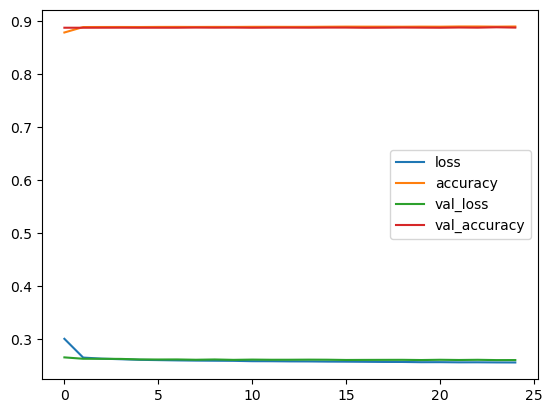

In [246]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [247]:
from sklearn.metrics import classification_report, confusion_matrix

In [248]:
predictions = model.predict(X_test)

2471/2471 [==============================] - 5s 2ms/step


In [250]:
predictions = predictions > 0.5

In [251]:
print(classification_report(predictions, y_test))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

       False       0.43      0.99      0.60      6878
        True       1.00      0.88      0.93     72166

    accuracy                           0.89     79044
   macro avg       0.72      0.93      0.77     79044
weighted avg       0.95      0.89      0.91     79044

[[ 6809  8849]
 [   69 63317]]


**Given the customer below, would you offer this person a loan?**

In [252]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
zip_code_48052          0.00
zip_code_70466          0.00
zip_code_86630          0.00
zip_code_93700          0.00
earliest_cr_year     1996.00
Name: 305323, Length: 77, dtype: float64

In [254]:
new_predict = model.predict(new_customer.values.reshape(1,77))
new_predict = new_predict > 0.5

1/1 [==============================] - 0s 32ms/step


In [255]:
new_predict

array([[ True]])

**Now we check to see if this person actually ended up paying back their loan or not**

In [257]:
df.iloc[random_ind]['loan_repaid']

1.0

### Meaning that the model has predicted the final situation correctly!!!